In [1]:
import yt 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import os
import functions

In [2]:
data_dir = r'test'
snapshot = r'plt01280'
test_fields = ['RHOB', 'WVX', 'WVY', 'WVZ', 'EPS']


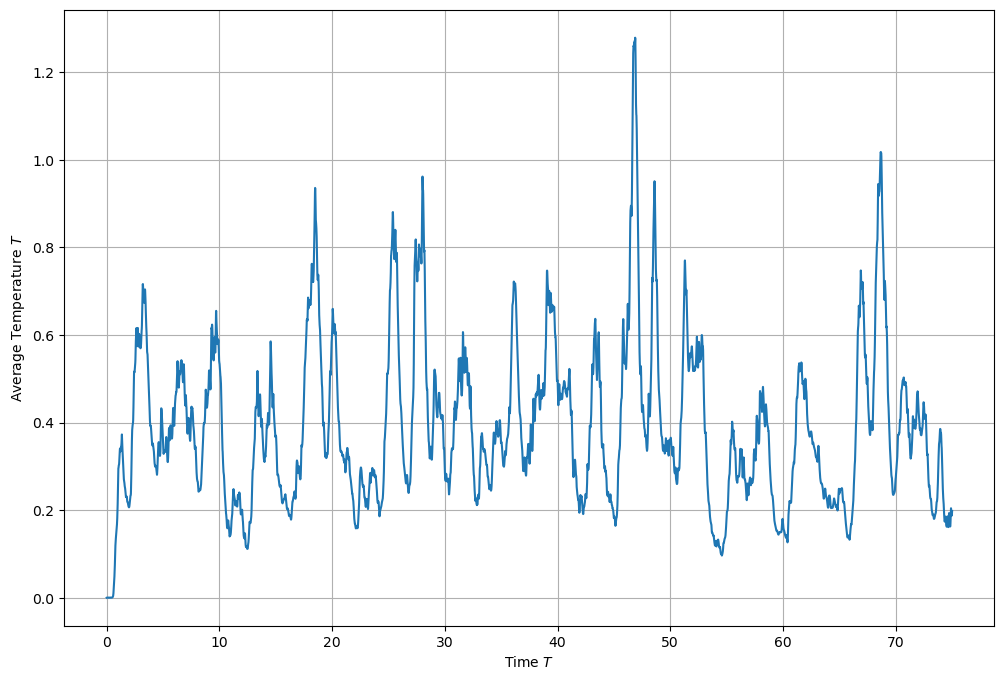

In [140]:
History = np.loadtxt(f'{data_dir}/output_history.asc', skiprows=1)
# sum, max, min
# 0, 1, 2 = RHOSTAR; 3, 4, 5 = TEMP; 6, 7, 9 = Lorentz; 9, 10, 11 = Kinetic; 12, 13, 14 = RHOSTAR_TEMP


rhostar_t = History[:, 13]
rhostar_t = rhostar_t[rhostar_t != 0]
rhostar = History[:, 1]
rhostar = rhostar[rhostar != 0]

average_t = rhostar_t/rhostar

hist_len = len(rhostar)

t = np.linspace(0, hist_len/79.9875, hist_len)

plt.figure(figsize=(12, 8))

plt.plot(t[0:6000], average_t[0:6000])

plt.xlabel(r'Time $T$')
plt.ylabel(r'Average Temperature $T$')
plt.grid()

os.makedirs(f'figures/{data_dir}', exist_ok=True)
plt.savefig(f'figures/{data_dir}/temp_history.png', dpi=300)


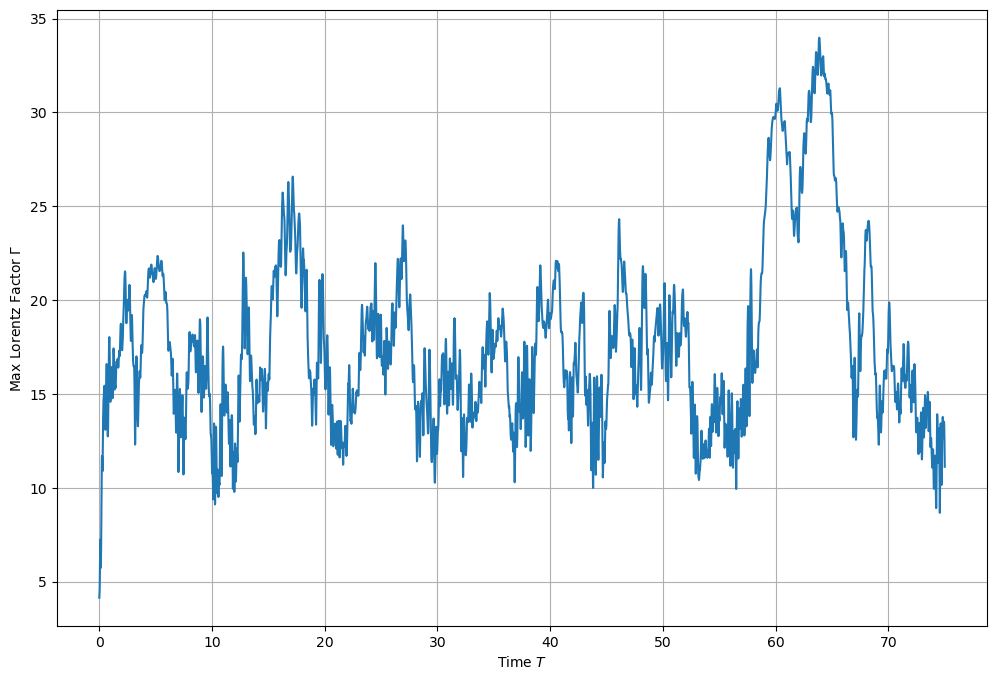

In [119]:
lorentz_max = History[:, 7]
lorentz_max = lorentz_max[lorentz_max != 0]

hist_len = len(lorentz_max)

t = np.linspace(0, hist_len/79.9875, hist_len)

plt.figure(figsize=(12, 8))

plt.plot(t[:6000], lorentz_max[:6000])

plt.xlabel(r'Time $T$')
plt.ylabel(r'Max Lorentz Factor $\Gamma$')
plt.grid()

os.makedirs(f'figures/{data_dir}', exist_ok=True)
plt.savefig(f'figures/{data_dir}/lorentz_history.png', dpi=300)


yt : [INFO     ] 2024-07-10 15:17:23,737 Parameters: current_time              = 10.0
yt : [INFO     ] 2024-07-10 15:17:23,739 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2024-07-10 15:17:23,739 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2024-07-10 15:17:23,740 Parameters: domain_right_edge         = [1. 1. 1.]


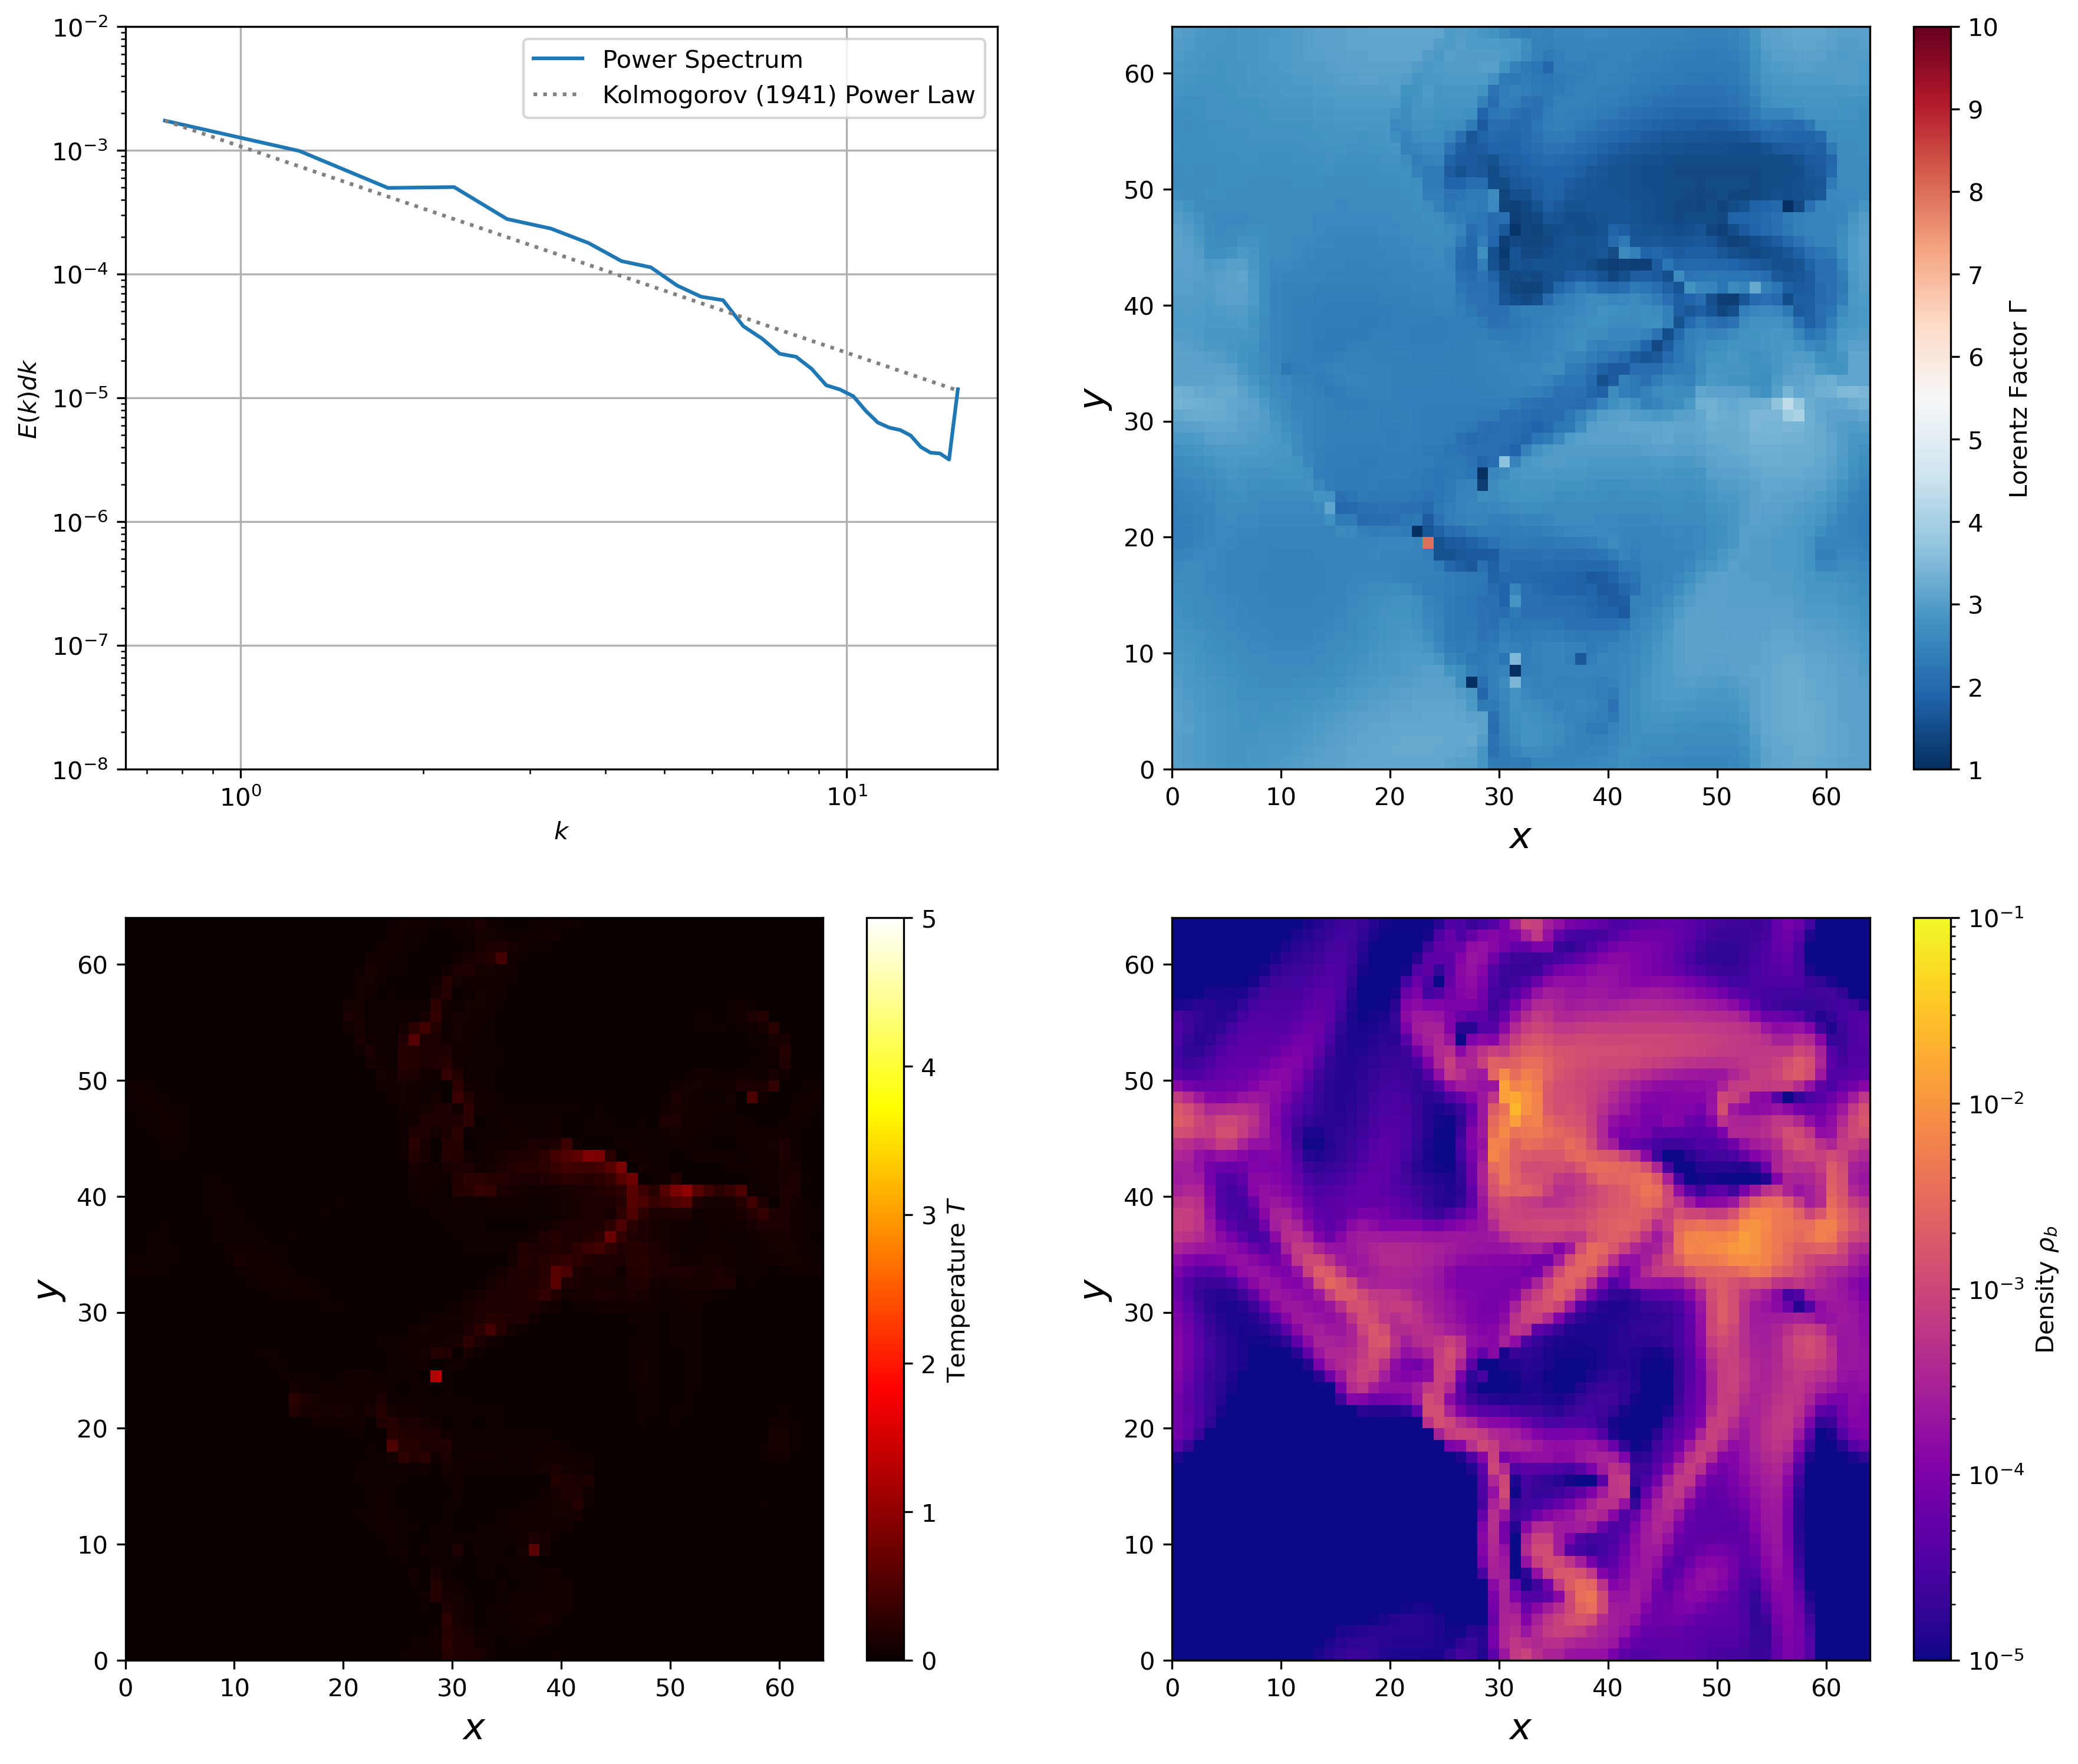

In [6]:
ds, cube = functions.load_snapshot(data_dir+ '/' + snapshot, test_fields)

rho = cube["RHOB"].d
eps = cube["EPS"].d
temp = eps/rho

lorentz = functions.lorentz(cube)

k, E_spectrum = functions.make_ke_ps(ds, cube)
index = np.argmax(E_spectrum)
kmax = k[index]
Emax = E_spectrum[index]


fig, ax = plt.subplots(2, 2, figsize=(14,12), dpi=300)

ax[0, 0].loglog(k, E_spectrum, label='Power Spectrum')
ax[0, 0].loglog(k, Emax*(k/kmax)**(-5/3), ls=':', color="0.5", label='Kolmogorov (1941) Power Law')
ax[0, 0].set_xlabel(r"$k$")
ax[0, 0].set_ylabel(r"$E(k)dk$")
ax[0, 0].set_ylim(1e-8, 1e-2)
ax[0, 0].grid()
ax[0, 0].legend()

im1 = ax[0, 1].pcolormesh(lorentz[:,:,32], cmap='RdBu_r', vmin = 1, vmax=10)
ax[0, 1].set_xlabel(r'$x$', fontsize=15)
ax[0, 1].set_ylabel(r'$y$', fontsize=15)
fig.colorbar(im1, ax=ax[0,1], label=r'Lorentz Factor $\Gamma$')

im2 = ax[1, 0].pcolormesh(temp[:,:,32], cmap="hot", vmin = 0, vmax = 5)
ax[1, 0].set_xlabel(r'$x$', fontsize=15)
ax[1, 0].set_ylabel(r'$y$', fontsize=15)
fig.colorbar(im2, ax=ax[1,0], label=r'Temperature $T$')

im3 = ax[1, 1].pcolormesh(rho[:, :, 32], cmap='plasma', norm=colors.LogNorm(vmin = 1e-5, vmax = 1e-1))
ax[1, 1].set_xlabel(r'$x$', fontsize=15)
ax[1, 1].set_ylabel(r'$y$', fontsize=15)
fig.colorbar(im3, ax=ax[1,1], label=r'Density $\rho_b$')

#plt.show()
os.makedirs(f'figures/{data_dir}', exist_ok=True)
plt.savefig(f'figures/{data_dir}/{snapshot}.png', dpi=300)